# Joint analysis of H0 MCMC analysis

In [1]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'



dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/h0_mcmc_scatter_joint.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'delta' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'h0_mcmc_scatter_joint.csv not found.')
        continue
    
data = pd.DataFrame(dict)
data

0000 h0_mcmc_scatter_joint.csv not found.
0001 h0_mcmc_scatter_joint.csv not found.
0002 h0_mcmc_scatter_joint.csv not found.
0003 h0_mcmc_scatter_joint.csv not found.
0004 h0_mcmc_scatter_joint.csv not found.
0005 h0_mcmc_scatter_joint.csv not found.
0006 h0_mcmc_scatter_joint.csv not found.
0007 h0_mcmc_scatter_joint.csv not found.
0008 h0_mcmc_scatter_joint.csv not found.
0009 h0_mcmc_scatter_joint.csv not found.
0010 h0_mcmc_scatter_joint.csv not found.
0011 h0_mcmc_scatter_joint.csv not found.
0012 h0_mcmc_scatter_joint.csv not found.
0013 h0_mcmc_scatter_joint.csv not found.
0014 h0_mcmc_scatter_joint.csv not found.
0015 h0_mcmc_scatter_joint.csv not found.
0016 h0_mcmc_scatter_joint.csv not found.
0017 h0_mcmc_scatter_joint.csv not found.
0018 h0_mcmc_scatter_joint.csv not found.
0019 h0_mcmc_scatter_joint.csv not found.
0020 h0_mcmc_scatter_joint.csv not found.
0021 h0_mcmc_scatter_joint.csv not found.
0022 h0_mcmc_scatter_joint.csv not found.
0023 h0_mcmc_scatter_joint.csv not

""


In [ ]:
# Remove unfinished out of bound values
data = data[data['delta'] < 0.5]
# Delta H0
DeltaH0 = data['delta'].values * 2 * 100
data['DeltaH0'] = DeltaH0
# Significance
data['Significance'] = data['delta'] / data['delta_err_lower']

# Save to disk
data.to_csv('../data/analysis_all/h0_mc_scatter_joint_all.csv')

In [ ]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_scatter_joint_all.csv')


In [ ]:
print(len(data))

1727


## Contour
Read and plot

In [ ]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_scatter_joint_all.csv')

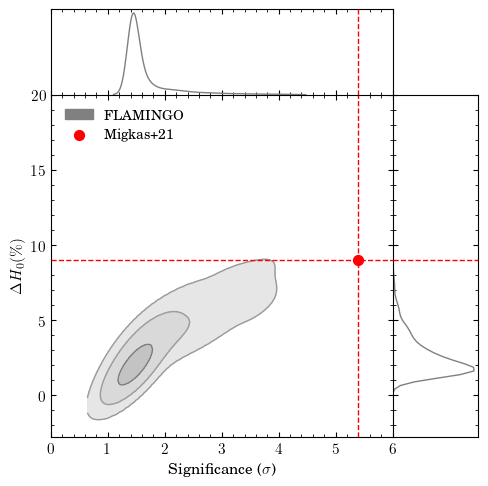

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('./nice.mplstyle')

contour_color = 'grey'

# Plot
g = sns.JointGrid(data,
                x='Significance', 
                y='DeltaH0',
                space=0,
                ratio=4,
                # marginal_ticks=True,
                height=5,
                # dpi=300
                xlim=(0, 6),
                ylim=(-2.8, 20),
                )

    
sns.kdeplot(data, 
            x='Significance',
            y='DeltaH0',
            fill=False, 
            levels=(0.011, 0.14, 0.61, 1.),
            bw_adjust=2.0,
            zorder=1,
            ax=g.ax_joint,
            color=contour_color
            )
sns.kdeplot(data,
            x='Significance',
            y='DeltaH0',
            fill=True, 
            levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
            bw_adjust=2.0,
            zorder=2,
            alpha=0.4,
            ax=g.ax_joint,
            color=contour_color,
            )

# plot marginal plots
g.plot_marginals(sns.kdeplot,
                fill=False,
                color=contour_color,
                )

# M21 results
x_point = 5.4
y_point = 9.0
g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
line0 = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, linewidths=1 ,label='Migkas+21', zorder=10)
#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

# x_point = 2.6
# y_point = 14
# g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
# line1 = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, linewidths=1 ,label='$Y_\\mathrm{{SZ}}-T$', zorder=10)
# #g.ax_joint.axhspan(ymin=14.0-3.4, ymax=14.0+3.4, color='tab:orange', alpha=0.2, zorder=0)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# matplotlib doesn't detect the contour correctly, adding it manually
import matplotlib.patches as mpatches
contour = mpatches.Patch(color=contour_color, label='FLAMINGO')

# Fix the legend
g.ax_joint.legend(handles=[contour, line0], loc='upper left', fontsize=10)

# Set x, ylabel
g.ax_joint.set_ylabel('$\Delta H_0 (\%)$')
g.ax_joint.set_xlabel('Significance ($\sigma$)')

plt.savefig('./to_paper/h0mc_hist_joint.pdf', bbox_inches='tight')

# Show the plot
plt.show()